Biological intelligence processes information incrementally while maintaining an internal model of what it's processing, built form past information and constantly updated as new information comes in. A *recurrent neural network (RNN)* adopts the same principle. 

In [1]:
# Preparing the IMDB data
from keras.datasets import imdb
from keras.preprocessing import sequence

max_features = 10000
maxlen = 500
batch_size = 32

print("Loading data...")
(input_train, y_train), (input_test, y_test) = imdb.load_data(
    num_words=max_features)
print(len(input_train), 'train sequences')
print(len(input_test),'test sequences')

print('Pad sequences (samples x time)')
input_train = sequence.pad_sequences(input_train, maxlen = maxlen)
input_test = sequence.pad_sequences(input_test, maxlen=maxlen)
print('input_train shape:', input_train.shape)
print('input_test shape:', input_test.shape)

Using TensorFlow backend.


Loading data...
(25000, 'train sequences')
(25000, 'test sequences')
Pad sequences (samples x time)
('input_train shape:', (25000, 500))
('input_test shape:', (25000, 500))


In [7]:
# Training the model with Embedding and SimpleRNN layers
from keras.layers import Dense
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN
model = Sequential()
model.add(Embedding(max_features,32))
model.add(SimpleRNN(32))
model.add(Dense(1, activation = 'sigmoid'))

model.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy', metrics = ['acc'])

history = model.fit(input_train, y_train,
                   epochs = 10,
                   batch_size = 128,
                   validation_split=0.2)


Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 24s 1ms/step - loss: 0.5873 - acc: 0.6818 - val_loss: 0.9383 - val_acc: 0.5442
Epoch 2/10
20000/20000 [==============================] - 23s 1ms/step - loss: 0.3601 - acc: 0.8536 - val_loss: 0.4368 - val_acc: 0.8014
Epoch 3/10
20000/20000 [==============================] - 26s 1ms/step - loss: 0.2781 - acc: 0.8930 - val_loss: 0.3703 - val_acc: 0.8510
Epoch 4/10
20000/20000 [==============================] - 25s 1ms/step - loss: 0.2172 - acc: 0.9190 - val_loss: 0.3601 - val_acc: 0.8716
Epoch 5/10
20000/20000 [==============================] - 23s 1ms/step - loss: 0.1717 - acc: 0.9374 - val_loss: 0.3909 - val_acc: 0.8490
Epoch 6/10
20000/20000 [==============================] - 24s 1ms/step - loss: 0.1335 - acc: 0.9532 - val_loss: 0.5181 - val_acc: 0.8414
Epoch 7/10
20000/20000 [==============================] - 27s 1ms/step - loss: 0.0850 - acc: 0.9727 - val_loss: 0.4254 - val_acc:

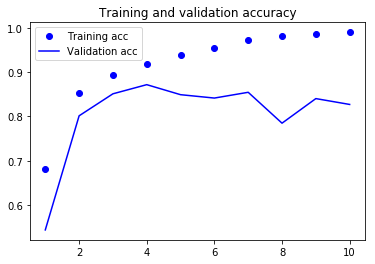

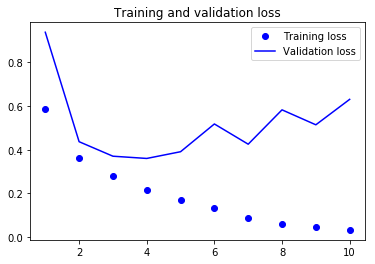

In [8]:
# Plotting results

import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1,len(acc) + 1)

plt.plot(epochs, acc, 'bo', label = 'Training acc')
plt.plot(epochs, val_acc,'b', label = 'Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.title("Training and validation loss")
plt.legend()

plt.show()

Inputs only considers the first 500 words, rather than full sequences; therefore, the RNN has access to less information than the earlier baseline model. In addition, SimpleRNN isn't good at processing long sequences (e.g. text)

## LSTM and GRU layers

SimpleRNN suffers from *vanishing gradient problem*: as more layers are added to the network, the network eventually becomes untrainable. LSTM and GRU layers are designed to solve this problem

In [10]:
# Using LSTM layer in Keras
from keras.layers import LSTM

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(LSTM(32))
model.add(Dense(1, activation = 'sigmoid'))
model.compile(optimizer = 'rmsprop',

              loss = 'binary_crossentropy',
             metrics = ['acc'])

history = model.fit(input_train, y_train,
                    epochs = 10,
                    batch_size = 128,
                    validation_split = 0.2)

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 72s 4ms/step - loss: 0.5119 - acc: 0.7582 - val_loss: 0.3690 - val_acc: 0.8482
Epoch 2/10
20000/20000 [==============================] - 66s 3ms/step - loss: 0.2819 - acc: 0.8880 - val_loss: 0.5698 - val_acc: 0.8056
Epoch 3/10
20000/20000 [==============================] - 66s 3ms/step - loss: 0.2334 - acc: 0.9125 - val_loss: 0.3037 - val_acc: 0.8798
Epoch 4/10
20000/20000 [==============================] - 67s 3ms/step - loss: 0.1985 - acc: 0.9272 - val_loss: 0.3163 - val_acc: 0.8636
Epoch 5/10
20000/20000 [==============================] - 67s 3ms/step - loss: 0.1749 - acc: 0.9362 - val_loss: 0.3908 - val_acc: 0.8650
Epoch 6/10
20000/20000 [==============================] - 66s 3ms/step - loss: 0.1577 - acc: 0.9437 - val_loss: 0.4334 - val_acc: 0.8714
Epoch 7/10
20000/20000 [==============================] - 66s 3ms/step - loss: 0.1440 - acc: 0.9483 - val_loss: 0.3627 - val_acc:

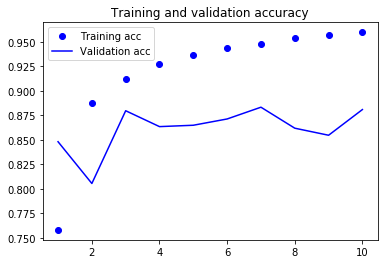

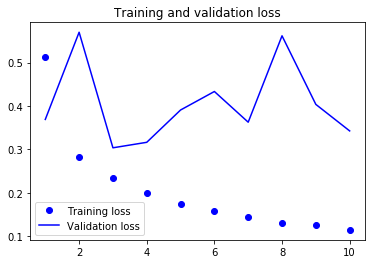

In [11]:
# Plotting results

plt.clf()

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1,len(acc) + 1)

plt.plot(epochs, acc, 'bo', label = 'Training acc')
plt.plot(epochs, val_acc,'b', label = 'Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.title("Training and validation loss")
plt.legend()

plt.show()